In [2]:
# Dependencies 
import pandas as pd
import requests
import string
import matplotlib.pyplot as plt
from config import api_key

base_url = 'https://api.census.gov/data/2019/pep/population?get=NAME,POP&for=county:*&key='

In [3]:
response = requests.get(base_url + api_key).json()
print(len(response))

3221


In [4]:
fatal_crashes_file = 'fatal_accidents_2019.csv'
crashes_df = pd.read_csv(fatal_crashes_file, low_memory=False)
crashes_df.columns

crashes_df = crashes_df[['COUNTYNAME','STATENAME', 'State']]
crash_count = crashes_df.groupby('COUNTYNAME').agg({'STATENAME':'max', 'State':'count'})

crash_count.reset_index(inplace=True)

#cleaning
crash_count.COUNTYNAME = crash_count.COUNTYNAME.map(lambda x: x.split(' (')[0])
#adding 'county' because I think it is easier than removing it from the population dataframe
crash_count.COUNTYNAME = crash_count.COUNTYNAME.map(lambda x: x + ' COUNTY')

crash_count.columns = ['CountyName', 'StateName', 'CrashCount']

crash_count

,CountyName,StateName,CrashCount
0,ABBEVILLE COUNTY,South Carolina,1
1,ACADIA COUNTY,Louisiana,13
2,ACCOMACK COUNTY,Virginia,5
3,ADA COUNTY,Idaho,21
4,ADAIR COUNTY,Oklahoma,11
...,...,...,...
2744,YUBA COUNTY,California,13
2745,YUKON-KOYUKUK COUNTY,Alaska,1
2746,YUMA COUNTY,Colorado,2
2747,YUMA COUNTY,Arizona,26


In [5]:
response.pop(0)
temp_pop_df = pd.DataFrame(response)
temp_pop_df.head()

,0,1,2,3
0,"Hidalgo County, New Mexico",4198,35,023
1,"Hudson County, New Jersey",672391,34,017
2,"Hunterdon County, New Jersey",124371,34,019
3,"Morris County, New Jersey",491845,34,027
4,"McKinley County, New Mexico",71367,35,031


In [6]:
pop_df = pd.DataFrame()
pop_df['CountyName'] = temp_pop_df[0].map(lambda x: x.split(',')[0].upper())
pop_df['StateName'] = temp_pop_df[0].map(lambda x: x.split(', ')[1])
pop_df['Population'] = temp_pop_df[1]

pop_df

,CountyName,StateName,Population
0,HIDALGO COUNTY,New Mexico,4198
1,HUDSON COUNTY,New Jersey,672391
2,HUNTERDON COUNTY,New Jersey,124371
3,MORRIS COUNTY,New Jersey,491845
4,MCKINLEY COUNTY,New Mexico,71367
...,...,...,...
3215,OKANOGAN COUNTY,Washington,42243
3216,KITTITAS COUNTY,Washington,47935
3217,BENTON COUNTY,Washington,204390
3218,CLARK COUNTY,Washington,488241


In [7]:
#2749, 3218

In [10]:
combined = pd.merge(crash_count, pop_df, how = 'inner', on= ['CountyName', 'StateName'])
combined.Population = combined.Population.astype(float)
combined.head()

,CountyName,StateName,CrashCount,Population
0,ABBEVILLE COUNTY,South Carolina,1,24527.0
1,ACCOMACK COUNTY,Virginia,5,32316.0
2,ADA COUNTY,Idaho,21,481587.0
3,ADAIR COUNTY,Oklahoma,11,22194.0
4,ADAMS COUNTY,Wisconsin,106,20220.0


In [11]:
combined.dtypes

CountyName     object
StateName      object
CrashCount      int64
Population    float64
dtype: object

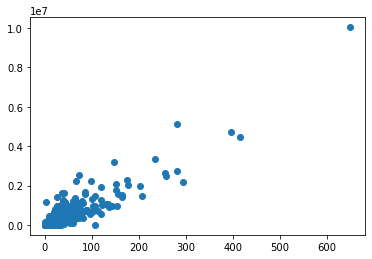

In [12]:
x_axis = combined.CrashCount
y_axis = combined.Population

plt.scatter(x_axis, y_axis)
plt.show()

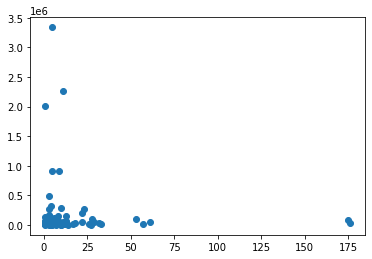

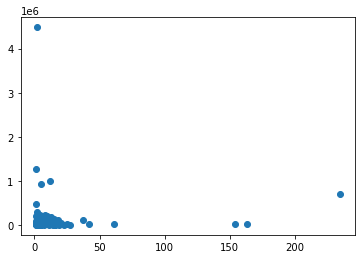

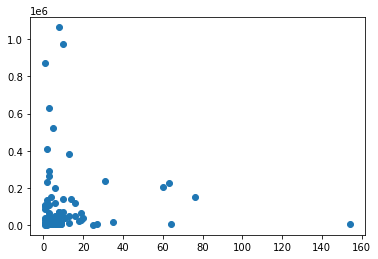

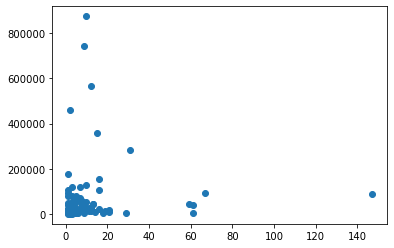

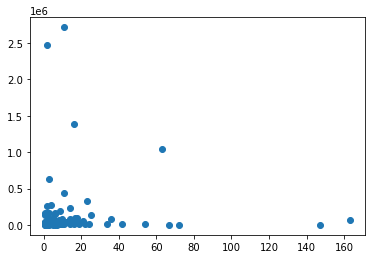

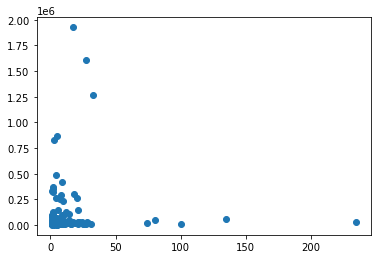

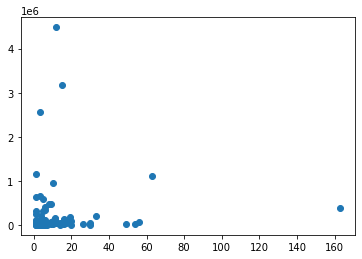

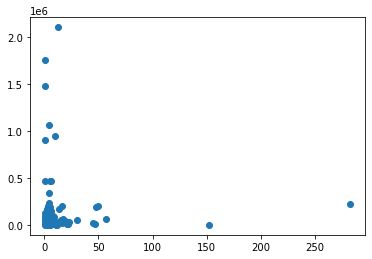

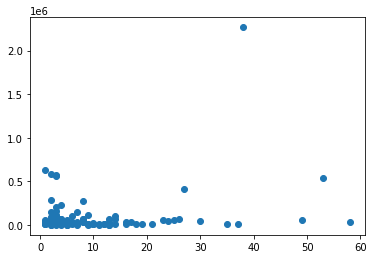

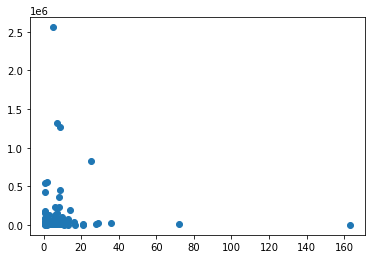

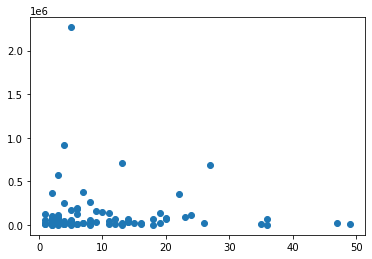

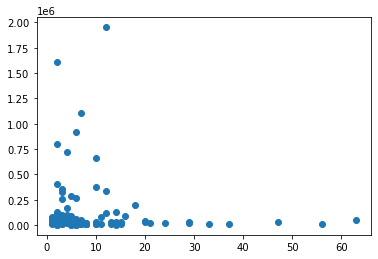

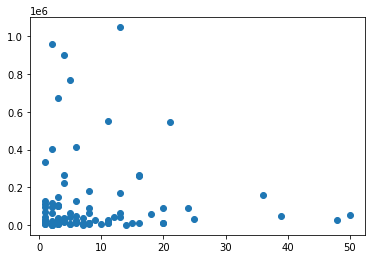

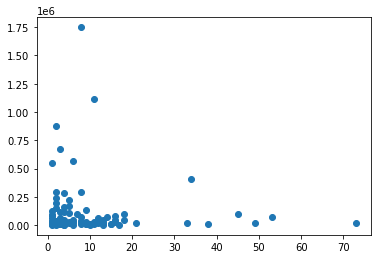

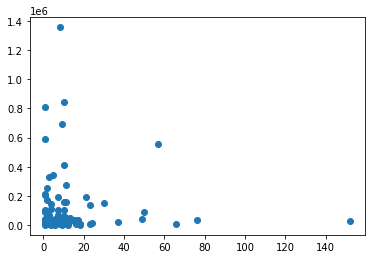

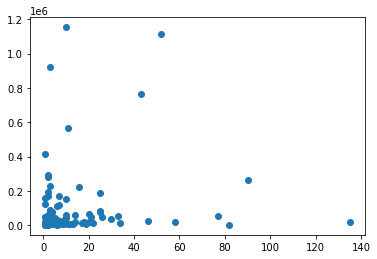

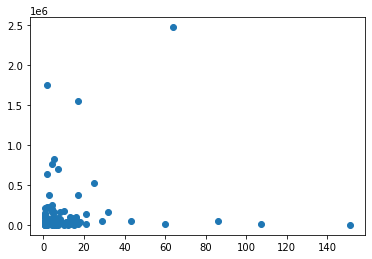

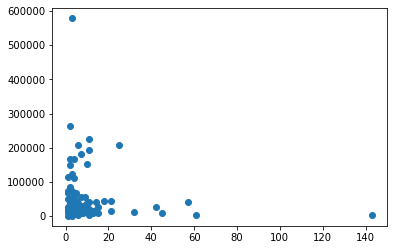

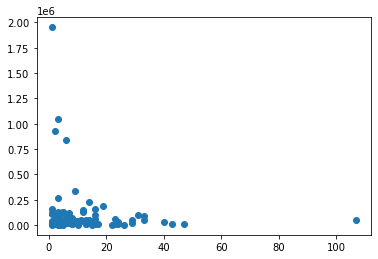

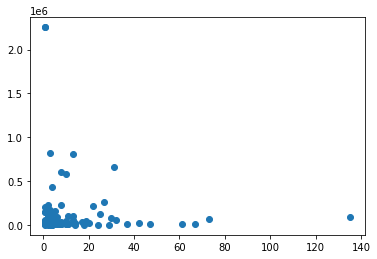

In [16]:
for i in range(0, 20):
    x_axis = combined.CrashCount.sample(100)
    y_axis = combined.Population.sample(100)
    plt.scatter(x_axis, y_axis)
    plt.show()

In [14]:
filter_df = combined.loc[combined.CrashCount < 50]
filter_df.shape

(2543, 4)

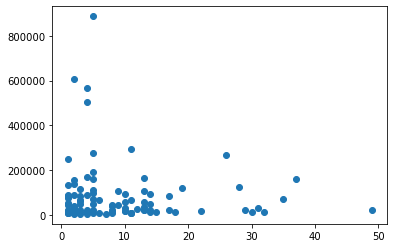

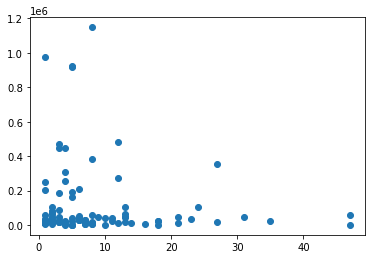

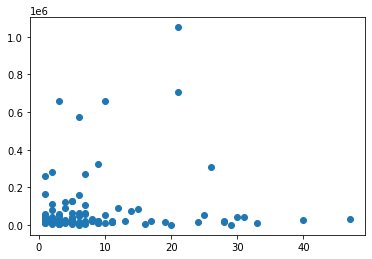

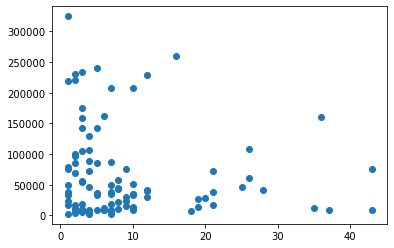

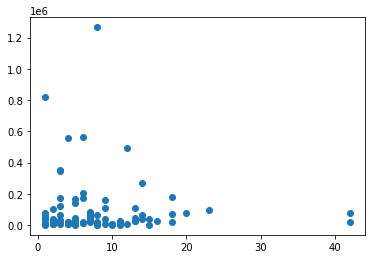

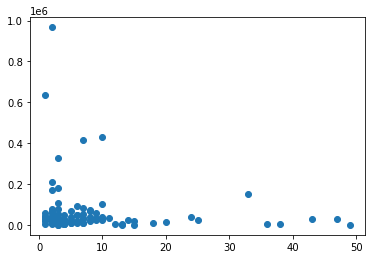

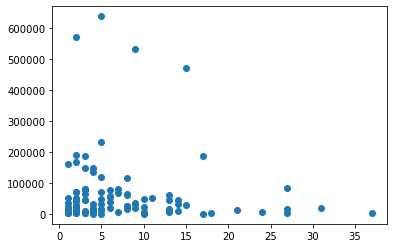

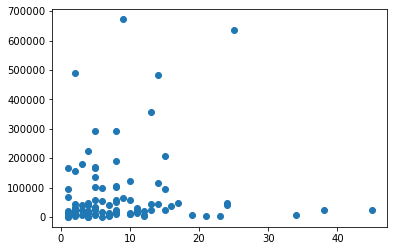

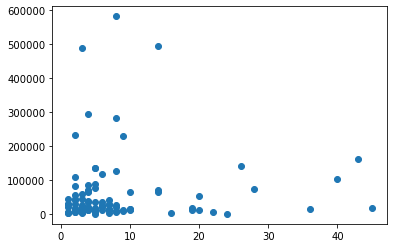

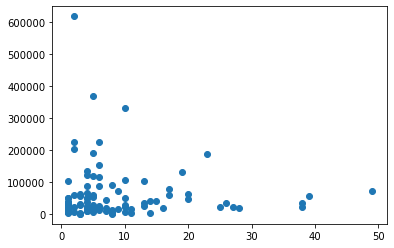

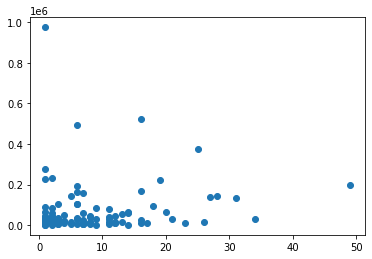

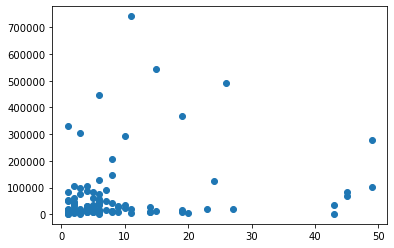

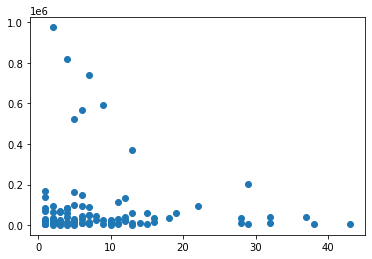

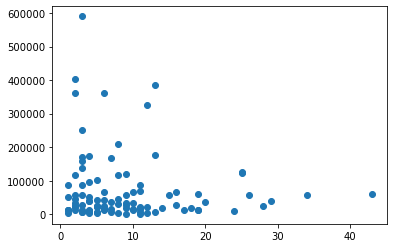

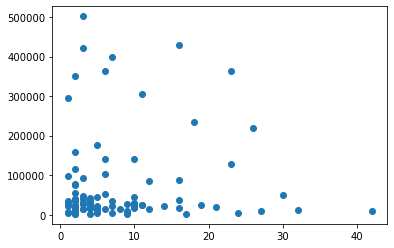

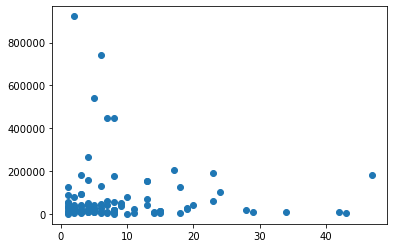

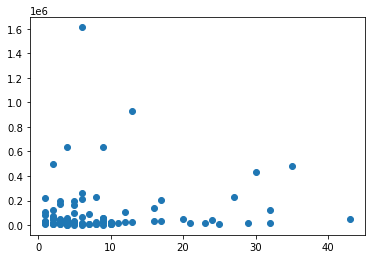

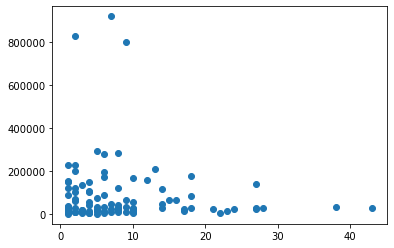

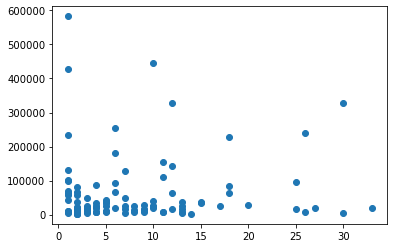

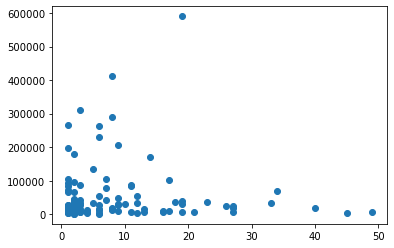

In [15]:
for i in range(0, 20):
    x_axis = filter_df.CrashCount.sample(100)
    y_axis = filter_df.Population.sample(100)
    plt.scatter(x_axis, y_axis)
    plt.show()